# Import Dependencies

In [1]:
from gurobipy import *
import pandas as pd
import numpy as np
import random

## functions

In [2]:
def matrix_multiplication_df(alpha, beta,i):
    # Perform element-wise multiplication
    matrix_product = np.outer(alpha.iloc[i].values, beta.iloc[i].values)
    
    # Create a new DataFrame with the same column and row names
    result = pd.DataFrame(
        matrix_product,
        index=alpha.columns,
        columns=beta.columns
    )
    
    return result

## Gurobi example (Not used)

In [3]:
# # Solve the following MIP:
# #  maximize
# #        x +   y + 2 z
# #  subject to
# #        x + 2 y + 3 z <= 4
# #        x +   y       >= 1
# #        x, y, z binary

# import gurobipy as gp

# # Create a new model
# m = gp.Model()

# # Create variables
# x = m.addVar(vtype='B', name="x")
# y = m.addVar(vtype='B', name="y")
# z = m.addVar(vtype='B', name="z")

# # Set objective function
# m.setObjective(x + y + 2 * z, gp.GRB.MAXIMIZE)

# # Add constraints
# m.addConstr(x + 2 * y + 3 * z <= 4)
# m.addConstr(x + y >= 1)

# # Solve it!
# m.optimize()

# Input Data

 threshold for energy burden ($\bar{E}b$) 

In [4]:
Eb = .05

In [5]:
county_name = 'San Diego County'
county_name = 'Los Angeles County'

### CATS

In [6]:
CATS_nodes = pd.read_csv('CATS_pv.csv')

In [7]:
SD_nodes = CATS_nodes[CATS_nodes['county_name']==county_name]

In [8]:
SD_nodes['geoid'].max()

6037980033.0

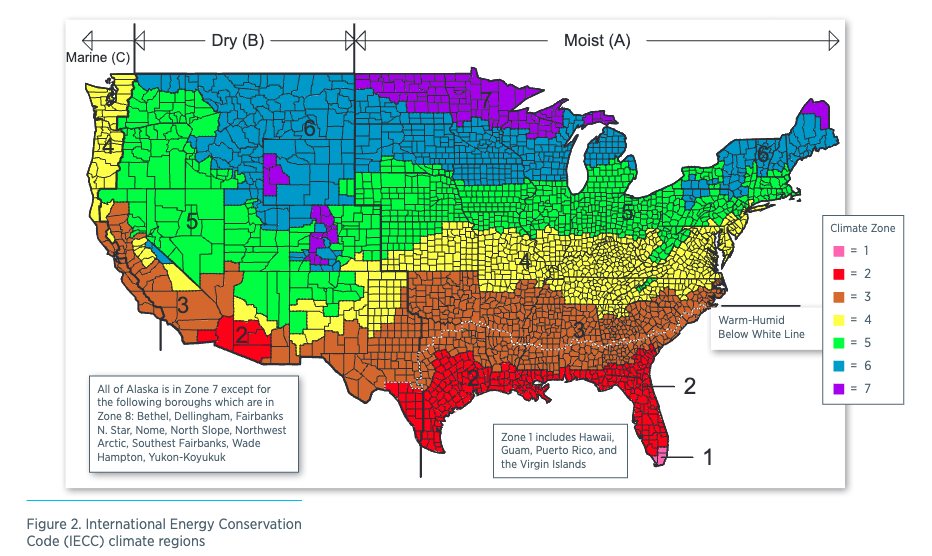

https://www.energy.gov/eere/buildings/articles/building-america-best-practices-series-volume-73-guide-determining-climate#page=6.12

In [9]:
SD_nodes['climate_zone_description'].unique()
climate_zone_mapping = {
    1: "Very Hot–Humid",
    2: "Hot–Humid",
    3: "Hot–Dry",
    4: "Mixed-Humid",
    5: "Cool",
    6: "Cold",
    7: "Very Cold",
    8: "Subarctic"
}

# Create the new column with the mapped descriptions
SD_nodes['climate_zone_description'] = SD_nodes['climate_zone'].map(climate_zone_mapping)


/var/folders/ym/z79dll090wxf8wncdssnz92r0000gn/T/ipykernel_19082/2345955385.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SD_nodes['climate_zone_description'] = SD_nodes['climate_zone'].map(climate_zone_mapping)


In [10]:
SD_nodes['climate_zone_description']

283     Hot–Dry
340     Hot–Dry
341     Hot–Dry
343     Hot–Dry
345     Hot–Dry
         ...   
8830    Hot–Dry
8831    Hot–Dry
8832    Hot–Dry
8833    Hot–Dry
8834    Hot–Dry
Name: climate_zone_description, Length: 1243, dtype: object

### LEAD

In [11]:
LEAD_raw = pd.read_csv('/Users/melek/Desktop/Research/Research_Winter_2024/Data/CA-2018-LEAD-data/CA AMI Census Tracts 2018.csv',low_memory=False)
display(LEAD_raw)

,ABV,FIP,TEN,YBL6,BLD,HFL,AMI68,UNITS,HINCP*UNITS,ELEP*UNITS,...,GASP UNITS,FULP UNITS,HCOUNT,ECOUNT,GCOUNT,FCOUNT,HINCP,ELEP,GASP,FULP
0,CA,6001400100,OWNER,1940-59,1 ATTACHED,BOTTLED GAS,0-30%,3.870226e-08,0.000000,0.000000,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CA,6001400100,OWNER,1940-59,1 ATTACHED,BOTTLED GAS,100%+,2.023086e-06,0.000000,0.000000,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CA,6001400100,OWNER,1940-59,1 ATTACHED,BOTTLED GAS,30-60%,2.996892e-09,0.000000,0.000000,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CA,6001400100,OWNER,1940-59,1 ATTACHED,BOTTLED GAS,60-80%,4.669163e-10,0.000000,0.000000,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CA,6001400100,OWNER,1940-59,1 ATTACHED,BOTTLED GAS,80-100%,1.464595e-06,0.000000,0.000000,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617710,CA,6115041100,RENTER,BEFORE 1940,1 DETACHED,WOOD,0-30%,2.378266e+00,0.000000,0.000000,...,0.000000,0.000000,1.4420,1.4420,1.4420,1.4420,NaN,NaN,NaN,NaN
4617711,CA,6115041100,RENTER,BEFORE 1940,1 DETACHED,WOOD,100%+,1.129144e+01,778372.855494,20877.536367,...,11.291440,11.291440,2.0875,1.2475,2.0875,1.2475,68934.774593,1848.970263,1.600343e-08,458.732909
4617712,CA,6115041100,RENTER,BEFORE 1940,1 DETACHED,WOOD,30-60%,3.735512e+00,98710.638581,0.000000,...,3.735512,3.735512,0.5780,0.5580,0.5780,0.5780,26424.925800,NaN,1.600343e-08,291.920942
4617713,CA,6115041100,RENTER,BEFORE 1940,1 DETACHED,WOOD,60-80%,3.994107e-02,1055.439840,0.000000,...,0.039941,0.039941,0.9140,0.0740,0.9140,0.9140,26424.925800,NaN,1.600343e-08,291.920942


In [12]:
LEAD_raw_sd = LEAD_raw[(LEAD_raw['FIP']<=(SD_nodes['geoid'].max()))&(LEAD_raw['FIP']>=(SD_nodes['geoid'].min()))]

In [13]:
(LEAD_raw_sd['HFL'].unique())

array(['BOTTLED GAS', 'ELECTRICITY', 'UTILITY GAS', 'NONE', 'WOOD',
       'FUEL OIL', 'OTHER', 'SOLAR', 'COAL'], dtype=object)

In [14]:
home_type_mapping = {
    '1 ATTACHED': 'Single Family Homes',
    '1 DETACHED': 'Single Family Homes',
    '3-4 UNIT': 'Small Multi-family buildings',
    '10-19 UNIT': 'Large Multi-family buildings',
    '20-49 UNIT': 'Large Multi-family buildings',
    '5-9 UNIT': 'Small Multi-family buildings',
    '50+ UNIT': 'Large Multi-family buildings',
    '2 UNIT': 'Small Multi-family buildings',
    'BOAT_RV_VAN': 'Mobile Homes',
    'MOBILE_TRAILER': 'Mobile Homes'
}

# Map the building types to home types
LEAD_raw_sd['HomeType'] = LEAD_raw_sd['BLD'].map(home_type_mapping)

/var/folders/ym/z79dll090wxf8wncdssnz92r0000gn/T/ipykernel_19082/905417770.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LEAD_raw_sd['HomeType'] = LEAD_raw_sd['BLD'].map(home_type_mapping)


In [15]:
fuel_category_mapping = {
    'ELECTRICITY': 'Electricity',
    'NONE': 'Others',
    'UTILITY GAS': 'Natural Gas',
    'BOTTLED GAS': 'Propane',
    'SOLAR': 'Others',
    'WOOD': 'Others',
    'OTHER': 'Others',
    'FUEL OIL': 'Fuel Oil',
    'COAL': 'Others'
}

# Map the HFL to fuel categories
LEAD_raw_sd['FuelCategory'] = LEAD_raw_sd['HFL'].map(fuel_category_mapping)

/var/folders/ym/z79dll090wxf8wncdssnz92r0000gn/T/ipykernel_19082/3751507567.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LEAD_raw_sd['FuelCategory'] = LEAD_raw_sd['HFL'].map(fuel_category_mapping)


In [16]:
# # Create the dictionary to hold the DataFrames
# fip_dict = {}

# # Get the unique FIPs
unique_fips = LEAD_raw_sd['FIP'].unique()
# for fip in unique_fips:
#     # Filter the data for the current FIP
#     fip_data = LEAD_raw_sd[LEAD_raw_sd['FIP'] == fip]
    
#     # Initialize a list to hold the rows
#     rows = []
    
#     # Get the home types
#     home_types = ['Single Family Homes', 'Small Multi-family buildings', 'Large Multi-family buildings', 'Mobile Homes']
    
#     # Get the fuel types
#     fuel_types = ['Natural Gas', 'Electricity', 'Fuel Oil', 'Propane', 'Others']
    
#     for home_type in home_types:
#         # Filter data by home type
#         home_data = fip_data[fip_data['HomeType'] == home_type]
        
#         # Count the total number of this home type
#         home_count = home_data.shape[0]
        
#         # Initialize the fuel counts
#         fuel_counts = {fuel: 0 for fuel in fuel_types}
        
#         # Count each fuel type for this home type
#         for fuel in fuel_types:
#             fuel_counts[fuel] = home_data[home_data['FuelCategory'] == fuel].shape[0]
        
#         # Append the row to the list
#         rows.append({
#             'HomeType': home_type,
#             # 'Nb': home_count,
#             'Nb': sum(fuel_counts.values()),
#             **fuel_counts
#         })
    
#     # Create a DataFrame for the current FIP
#     fip_df = pd.DataFrame(rows)
    
#     # Add the DataFrame to the dictionary
#     fip_dict[fip] = fip_df
        
# # Show the dictionary
# # for fip, df in fip_dict.items():
# #     display(f"FIP: {fip}")
# #     display(df)
# #     display()

the only difference between the above and below is that the new code uses the home type as an index (i.e. row name) instead of an extra entry in each row

In [17]:
fip_dict = {}
unique_fips = LEAD_raw_sd['FIP'].unique()
for fip in unique_fips:
    # Filter the data for the current FIP
    fip_data = LEAD_raw_sd[LEAD_raw_sd['FIP'] == fip]
    
    # Initialize a list to hold the rows
    rows = []
    
    # Get the home types
    home_types = ['Single Family Homes', 'Small Multi-family buildings', 'Large Multi-family buildings', 'Mobile Homes']
    
    # Get the fuel types
    fuel_types = ['Natural Gas', 'Electricity', 'Fuel Oil', 'Propane', 'Others']
    
    for home_type in home_types:
        # Filter data by home type
        home_data = fip_data[fip_data['HomeType'] == home_type]
        
        # Count the total number of this home type
        home_count = home_data.shape[0]
        
        # Initialize the fuel counts
        fuel_counts = {fuel: 0 for fuel in fuel_types}
        
        # Count each fuel type for this home type
        for fuel in fuel_types:
            fuel_counts[fuel] = home_data[home_data['FuelCategory'] == fuel].shape[0]
        
        # Append the row to the list
        rows.append({
            # 'Nb': sum(fuel_counts.values()),
            **fuel_counts
        })
    
    # Create a DataFrame for the current FIP
    fip_df = pd.DataFrame(rows, index=home_types)
    
    # Add the DataFrame to the dictionary
    fip_dict[fip] = fip_df
for t in fip_dict.keys():
    Nb = np.sum(fip_dict[t],axis=1)
    fip_dict[t]['Nb']= Nb
    if np.sum(Nb)==0:
        print(t)

### Weatherization

https://www.osti.gov/biblio/2004934

In [18]:
doe_lead = pd.read_csv('/Users/melek/Desktop/Research/Research_Winter_2024/Data/doe_2023_communities_leap_data.csv',low_memory=False)
doe_lead['Census_Tract'] = doe_lead['AFFGEOID'].apply(lambda x: int(x[9:-1]))
# location filter
# doe_lead = doe_lead[doe_lead['COUNTY_NAME']==' San Diego County']
# doe_lead = doe_lead[doe_lead['COUNTY_NAME']==' Los Angeles County']
doe_lead = doe_lead[doe_lead['COUNTY_NAME']==' ' + county_name]

In [19]:
# Define the conditions
condition1 = (doe_lead['AEB_Screen']=='Yes') & (doe_lead['PCT_LI_Screen'] == 'Yes') & (doe_lead['CEJST_DAC'] == 'Yes')
condition2 = (doe_lead['AEB_Screen']=='Yes') & (doe_lead['PCT_LI_Screen'] == 'Yes') & ((doe_lead['CoalClosure'] == 'Yes') | (doe_lead['MSAnonMSA_Emp'] == 'Yes'))
# Create a new column 'Result' with 1 if either condition1 or condition2 is true, otherwise 0
doe_lead['Eligible'] = ((condition1) | (condition2)).astype(int)


In [20]:
eligible_tracts = (doe_lead[doe_lead['Eligible']==1]['Census_Tract']).reset_index(drop=True)
display(eligible_tracts)

0     603710950
1     603720630
2     603720630
3     603722190
4     603722890
5     603724220
6     603724260
7     603790010
8     603790060
9     603798001
10    603798003
Name: Census_Tract, dtype: int64

### PV Solar Rooftop Energy Potential

#### SEEDS II

see 'SEEDSII REPLICA Documentation (1) (1).pdf' for documentation of each column

In [21]:
pv = pd.read_csv('/Users/melek/Desktop/Research/Research_Winter_2024/Data/seeds_ii_replica (1).csv',low_memory=False)
pv = pv[pv['state_fips']==6]

#### Project sunroof

https://sunroof.withgoogle.com/data-explorer/place/ChIJPV4oX_65j4ARVW8IJ6IJUYs/

In [22]:
proj_sunroof = pd.read_csv('/Users/melek/Desktop/Research/Research_Winter_2024/Data/project-sunroof-census_tract.csv')
proj_sunroof = proj_sunroof[
    (proj_sunroof['region_name']>=SD_nodes['geoid'].min()) &
    (proj_sunroof['region_name']<=SD_nodes['geoid'].max())
]
proj_sunroof

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,...,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets_json,carbon_offset_metric_tons,existing_installs_count
3542,6037102105,California,34.215118,34.206558,-118.343010,-118.353088,34.209869,-118.349258,1405.05,444.0,...,8.508317e+04,2.207964e+06,1.165866e+06,1.277911e+06,2.226522e+06,11701.131543,6.963346e+06,"[[0,106],[5,206],[10,81],[15,23],[20,8],[25,5]...",1898.424047,3.0
3543,6037102107,California,34.260342,34.222271,-118.290771,-118.367889,34.240475,-118.338013,1405.05,1107.0,...,2.103623e+05,7.365770e+06,2.693444e+06,3.739787e+06,8.594137e+06,13993.022382,2.260350e+07,"[[0,256],[5,359],[10,243],[15,117],[20,62],[25...",6162.415635,35.0
3544,6037103101,California,34.282009,34.266850,-118.296967,-118.317596,34.273239,-118.307892,1405.05,854.0,...,2.283957e+05,4.383844e+06,1.600881e+06,3.054207e+06,3.370422e+06,11928.004657,1.263775e+07,"[[0,216],[5,369],[10,196],[15,46],[20,12],[25,...",3445.442780,13.0
3545,6037103102,California,34.266972,34.258690,-118.297920,-118.315750,34.263386,-118.307388,1405.05,1373.0,...,2.543885e+05,6.805988e+06,2.439802e+06,4.528096e+06,4.752428e+06,10449.641431,1.878070e+07,"[[0,442],[5,597],[10,223],[15,56],[20,20],[25,...",5120.202117,18.0
3546,6037103200,California,34.289471,34.259682,-118.314758,-118.373039,34.273354,-118.340233,1405.05,1587.0,...,3.928312e+05,1.034823e+07,4.671087e+06,5.395588e+06,1.052870e+07,13540.831305,3.133644e+07,"[[0,337],[5,575],[10,331],[15,180],[20,68],[25...",8543.286131,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6032,6037980026,California,34.293259,34.252270,-118.238792,-118.351730,34.275188,-118.279221,1405.05,12.0,...,0.000000e+00,4.320584e+04,3.964088e+04,3.370969e+04,6.698851e+04,12435.891797,1.835449e+05,"[[0,2],[5,4],[10,3],[15,3]]",50.040040,0.0
6033,6037980028,California,33.957409,33.916321,-118.368378,-118.452461,33.939854,-118.413521,1405.05,502.0,...,4.385186e+05,3.271680e+06,2.613109e+06,6.447342e+06,1.112261e+08,64580.068164,1.239967e+08,"[[0,61],[5,57],[10,44],[15,34],[20,14],[25,15]...",33804.404108,3.0
6034,6037980030,California,33.916771,33.901649,-118.395882,-118.437119,33.909767,-118.414284,1405.05,212.0,...,1.596232e+04,8.409885e+05,3.107981e+05,5.355379e+05,1.255351e+07,24561.470508,1.425680e+07,"[[0,29],[5,39],[10,31],[15,21],[20,9],[25,14],...",3886.845088,3.0
6035,6037980031,California,33.770988,33.703651,-118.231796,-118.291054,33.735630,-118.262840,1405.05,521.0,...,2.367097e+05,2.673632e+06,2.012763e+06,3.088203e+06,4.683065e+07,27157.583008,5.484195e+07,"[[0,104],[5,78],[10,52],[15,41],[20,24],[25,16...",14901.217981,7.0


In [23]:
proj_sunroof.columns

Index(['region_name', 'state_name', 'lat_max', 'lat_min', 'lng_max', 'lng_min',
       'lat_avg', 'lng_avg', 'yearly_sunlight_kwh_kw_threshold_avg',
       'count_qualified', 'percent_covered', 'percent_qualified',
       'number_of_panels_n', 'number_of_panels_s', 'number_of_panels_e',
       'number_of_panels_w', 'number_of_panels_f', 'number_of_panels_median',
       'number_of_panels_total', 'kw_median', 'kw_total',
       'yearly_sunlight_kwh_n', 'yearly_sunlight_kwh_s',
       'yearly_sunlight_kwh_e', 'yearly_sunlight_kwh_w',
       'yearly_sunlight_kwh_f', 'yearly_sunlight_kwh_median',
       'yearly_sunlight_kwh_total', 'install_size_kw_buckets_json',
       'carbon_offset_metric_tons', 'existing_installs_count'],
      dtype='object')

In [24]:
# tau_df = pd.DataFrame(Tau, columns=['region_name'])

# # Perform a left join with proj_sunroof on 'region_name'
# result_df = tau_df.merge(proj_sunroof[['region_name', 'yearly_sunlight_kwh_kw_threshold_avg']],
#                          on='region_name', 
#                          how='left')

# # Rename the columns to match the desired output
# result_df.rename(columns={'region_name': 'tract', 
#                           'yearly_sunlight_kwh_kw_threshold_avg': 'annual solar productivity'}, inplace=True)

# # Display the resulting DataFrame
# display(result_df)

used later:

In [25]:
Tau = SD_nodes['geoid'].unique()

In [26]:
zeta = pd.DataFrame(Tau, columns=['tract']).merge(
    proj_sunroof[['region_name', 'yearly_sunlight_kwh_kw_threshold_avg']],
    left_on='tract',
    right_on='region_name',
    how='left'
).drop(
    columns='region_name'
).rename(
    columns={'yearly_sunlight_kwh_kw_threshold_avg': 'zeta',
            'tract':'Tau'}
).fillna(0)

## Paper Tables

### Table 1 Average national cost of weatherization interventions per house type (WAP).

In [28]:
data = {
    "Home type": [
        "Small Multi-family buildings",
        "Large Multi-family buildings",
        "Single Family Homes",
        "Mobile Homes"
    ],
    "Weatherization Cost($)": [
        2645,
        2159,
        2846,
        2721
    ]
}

homes = pd.DataFrame(data)
homes.set_index('Home type', inplace=True)
display(homes)

,Weatherization Cost($)
Home type,
Small Multi-family buildings,2645
Large Multi-family buildings,2159
Single Family Homes,2846
Mobile Homes,2721


### Table 2 Fuel cost factors per type of home $(\lambda_{f,h})$.

#### Eq. (27) relation between the weatherization intervention costs and the fuel type

$\lambda_{f,h} = \frac{C_{f,h}}{\bar{C_h}}\space \forall f\in \mathcal{F}\space \forall h \in \mathcal{H}$

In [29]:
homes['lamda Nat Gas'] = [1.09, 0.88, 0.97, 0.92] # natural gas cost factors per type of home
homes['lamda Elect'] = [0.92, 1.00, 0.98, 1.18] # electricity cost factors per type of home
homes['lamda Ful Oil'] = [0.80, 1.15, 1.21, 0.93] # oil cost factors per type of home
homes['lamda Prop']= [0.82, 1.00, 1.03, 0.95] # propane cost factors per type of home
homes['lamda Other'] = [0.93, 1.00, 0.96, 1.06] # other cost factors per type of home

display(homes)

,Weatherization Cost($),lamda Nat Gas,lamda Elect,lamda Ful Oil,lamda Prop,lamda Other
Home type,,,,,,
Small Multi-family buildings,2645,1.09,0.92,0.80,0.82,0.93
Large Multi-family buildings,2159,0.88,1.00,1.15,1.00,1.00
Single Family Homes,2846,0.97,0.98,1.21,1.03,0.96
Mobile Homes,2721,0.92,1.18,0.93,0.95,1.06


### Table 3 Climate cost factors per type of home $(\mu_{𝑐,h})$.

#### Eq. (28)  climate impact coefficients associated with the weatherization costs per building type

$\mu_{c,h} = \frac{C_{c,h}}{\bar{C_h}}\space \forall c \in \mathbb{C} \space \forall h \in \mathcal{H}$

In [30]:
homes['mu Very Cold']= [1.31, 1.31, 1.42, 1.24]
homes['mu Cold']     = [0.73, 0.73, 0.79, 0.82]
homes['mu Moderate'] = [0.91, 0.91, 0.88, 0.86]
homes['mu Hot-Humid']= [0.91, 0.91, 1.15, 0.86]
homes['mu Hot-Dry']  = [0.91, 0.91, 0.89, 0.86]

### Table 4 Average national energy savings per home type (WAP).

In [31]:
homes['Savings per home (%)'] = [13.9, 12.3, 12.4, 8.2]

### Table 5 Fuel type savings factors per type of home $(\alpha_{f,h})$

#### Eq. (30) fuel types saving coefficients

$\alpha_{f,h} = \frac{S_{f,h}}{\bar{S_h}}\space \forall f \in \mathcal{F}\space \forall h \in \mathcal{H}$

In [32]:
homes['alpha Natural Gas'] = [1.01, 1.02, 0.99, 0.96]
homes['alpha Electricity'] = [1.01, 1.02, 0.84, 0.82]
homes['alpha Fuel Oil']= [0.96, 1.95, 1.06, 1.07]
homes['alpha Propane'] = [0.81, 0.81, 1.12, 1.21]
homes['alpha Other'] = [0.92, 0.92, 0.92, 0.87]

### Table 6 Climate savings factors per home type $(\beta_{𝑐,h})$.

#### Eq. (31) climate zone saving coefficients

$\beta_{c,h} = \frac{C_{c,h}}{\bar{C_h}}\space \forall c \in \mathbb{C} \space \forall h \in \mathcal{H}$

In [33]:
homes['beta Very Cold'] = [1.07, 1.07, 1.10, 1.14]
homes['beta Cold'] = [1.05, 0.57, 1.12, 1.18]
homes['beta Moderate']= [0.60, 0.60, 0.82,0.72]
homes['beta Hot-Humid'] = [0.60, 0.60, 0.86,0.72]
homes['beta Hot-Dry'] = [0.60, 0.60, 0.42,0.72]

### Table 7 Cost of interventions considered in the analysis.

In [131]:
data = {'Intervention': [
    'Rooftop solar',
    'Community solar',
    'Community wind',
    'Weatherization'],
        'Cost (/MW or /building)':
        [2.369*10**6,
         1.554*10**6,
         2.494*10**6,
        np.nan],
        'Lifetime':
        [20,
         20,
         15,
         35]
       }
interventions = pd.DataFrame(data)

interventions.set_index('Intervention', inplace=True)

display(interventions)

,Cost (/MW or /building),Lifetime
Intervention,,
Rooftop solar,2369000.0,20
Community solar,1554000.0,20
Community wind,2494000.0,15
Weatherization,NaN,35


# Sets

## $\mathcal{T}$ Sets of tracts
indexed by 𝜏

In [35]:
Tau = SD_nodes['geoid'].unique()
len(Tau)

489

## $\mathcal{P}$ Sets of policy interventions
indexed generically by $p$ and referring to the following interventions {w: weatherization, rts: rooftop solar, cs: community solar, cw: community wind}.

In [36]:
P = ['w', 'rts', 'cs', 'cw']

## $\mathcal{F}$ set of fuel types

Set of fuel types, indexed by $f$ and referring in the model to the following fuel types {el: electricity,
gs: gas, of: other fuels}.

In [37]:
F = ['el', 'gs', 'of']

### Fuel Types

In [38]:
F_types = ['Natural gas', 'Electricity', 'Fuel oil', 'Propane','Other']

### Fuel type mapping

In [39]:
f_mapping = {
    0: 'Nat Gas',
    1: 'Elect',
    2: 'Ful Oil',
    3: 'Prop',
    4: 'Other'
}

## $\mathbb{K}_p^\tau$ Set of household archetypes eligible for policy intervention 𝑝 in tract 𝜏, indexed by 𝑘

### $\mathbb{K}^\tau$ Set of household archetypes in tract $\tau$

In [40]:
# K = fip_dict
K = {key: fip_dict[key] for key in Tau if key in fip_dict}

print('number of considered census tracts in set K:')
print(len(K.keys()))

number of considered census tracts in set K:
479


### $\mathbb{K}_{rts}^\tau$ households eligible for **rooftop solar** (RTS) in tract $\tau$

In [41]:
rts_ProjSunroof = proj_sunroof[proj_sunroof['region_name'].isin(Tau)]
rts_ProjSunroof['yearly_sunlight_kwh_kw_threshold_avg']
rts_ProjSunroof_cleaned = rts_ProjSunroof.dropna(subset=['yearly_sunlight_kwh_kw_threshold_avg'])
# rts_ProjSunroof_cleaned

In [42]:
K_rts = {}
for i in K.keys():
    # if random.random() < 0.5:  # 50% chance to skip the current key
    #     continue
    K_rts[i] = K[i]
    K_rts[i]['Nb'] = np.round(K_rts[i]['Nb']*0.5*random.random())
Tau_rts = list(K_rts.keys())

print('number of considered census tracts in set K_rts:')
print(len(K_rts.keys()))

number of considered census tracts in set K_rts:
479


### $\mathbb{K}_{cs}^\tau$ households eligible for **comunity solar** (CS) in tract $\tau$

In [43]:
K_cs = {}
for i in K.keys():
    if random.random() < 0.5:  # 50% chance to skip the current key
        continue
    if not zeta['Tau'].isin([i]).any():
        continue
    if (zeta.loc[zeta['Tau'] == i, 'zeta'] == 0).any():
        continue
    K_cs[i] = K[i]
    
Tau_cs = list(K_cs.keys())

print('number of considered census tracts in set K_cs:')
print(len(K_cs.keys()))

number of considered census tracts in set K_cs:
197


### $\mathbb{K}_{cw}^\tau$ households eligible for **comunity wind** (CW) in tract $\tau$

In [44]:
K_cw = {}
for i in K.keys():
    if random.random() < 0.5:  # 50% chance to skip the current key
        continue
    K_cw[i] = K[i]
    
Tau_cw = list(K_cw.keys())
print('number of considered census tracts in set K_cw:')
print(len(K_cw.keys()))

number of considered census tracts in set K_cw:
255


## $\mathbb{K}_{w-f}$ Set of household archetypes eligible for weatherization policies with $f$ as heating fuel type.

In [45]:
eligible_w = {}
for i in eligible_tracts.keys():
    for key in K.keys():
        if key >= eligible_tracts[i]*10 and key <= eligible_tracts[i]*10+9:
            eligible_w[key] = K[key]
K_w = eligible_w
Tau_w = list(K_w.keys())

### $\mathbb{K}_{w-el}$ Set of household archetypes eligible for weatherization policies with electricity as heating fuel type

In [46]:
K_w_el = {}
columns_to_keep = ['Nb', 'Electricity']
for key in K_w.keys():
    df = K_w[key]
    df_filtered = df[columns_to_keep]
    K_w_el[key] = df_filtered

### $\mathbb{K}_{w-gs}$ Set of household archetypes eligible for weatherization policies with gas as heating fuel type

In [47]:
K_w_gs = {}
columns_to_keep = ['Nb', 'Natural Gas']
for key in K_w.keys():
    df = K_w[key]
    df_filtered = df[columns_to_keep]
    K_w_gs[key] = df_filtered

### $\mathbb{K}_{w-of}$ Set of household archetypes eligible for weatherization policies with other fuels as heating fuel type

In [48]:
K_w_of = {}
columns_to_keep = ['Nb', 'Fuel Oil', 'Propane','Others']
for key in K_w.keys():
    df = K_w[key]
    df_filtered = df[columns_to_keep]
    K_w_of[key] = df_filtered

## $\mathcal{H}$ Set of home construction types
in this study we use small multi-family, large multi-family, single family homes, mobile homes.

In [49]:
H = homes.index.unique()

## $\mathbb{C}$ Set of climate zones

The first line below is the orignal state space considered in the paper, however, to ensure that we only consider climate zones that are in the data, the second line is used (this just makes the state space smaller)

In [50]:
C = ['Very cold','Cold', 'Moderate','Hot–Humid','Hot–Dry']
C = SD_nodes['climate_zone_description'].unique() 

# Paramaters

## $Nb_k$ Number of households of archetype $k$

found in $K$. example of accessing one is below:

In [51]:
K[Tau[0]]['Nb'][H]

Home type
Small Multi-family buildings     0.0
Large Multi-family buildings     0.0
Single Family Homes             57.0
Mobile Homes                    13.0
Name: Nb, dtype: float64

## $\zeta_\tau$ Solar productivity factor for tract $\tau$

zeta defined in **Project sunroof** 

In [52]:
print(len(zeta[(zeta['Tau'].isin(K_cs.keys()))&(zeta['zeta']>0)]['zeta'].values))
print(len(K_cs.keys()))

197
197


In [53]:
# zeta_randoms =  np.random.random(len(K_cs.keys()))*0.05+0.28
CS = pd.DataFrame({
    'tau': K_cs.keys(),
    # 'CS_bar': np.inf,
    'zeta': zeta[zeta['Tau'].isin(K_cs.keys())]['zeta'].values
})
display(CS)

,tau,zeta
0,6.037109e+09,1405.05
1,6.037107e+09,1405.05
2,6.037295e+09,1405.05
3,6.037139e+09,1405.05
4,6.037404e+09,1405.05
...,...,...
192,6.037107e+09,1405.05
193,6.037194e+09,1405.05
194,6.037570e+09,1405.05
195,6.037262e+09,1405.05


## $\eta_\tau$ Wind productivity factor for tract $\tau$

In [54]:
eta_randoms = np.random.random(len(K_cw.keys())) * 0.3 + 0.1
# Create the DataFrame
CW = pd.DataFrame({
    'tau': list(K_cw.keys()),
    # 'CW_bar': CW_randoms,
    'eta': eta_randoms
})
# display(CW)

## $IC_p$ Investment costs associated with policy intervention $p$

**see Eq. (2)** 'weatherization intervention costs dedicated to a household archetype $𝑘$'

## $L_p$ Lifetime of the investments associated with policy intervention $p$

In [55]:
L = pd.DataFrame({
    'rts': [interventions.loc[interventions['Intervention'] == 'Rooftop solar', 'Lifetime'].values[0]],
    'cs': [interventions.loc[interventions['Intervention'] == 'Community solar', 'Lifetime'].values[0]],
    'cw': [interventions.loc[interventions['Intervention'] == 'Community wind', 'Lifetime'].values[0]],
    'w': [interventions.loc[interventions['Intervention'] == 'Weatherization', 'Lifetime'].values[0]]
})

## $Pel$ Price of electricity

## $WS_k$ Percentage of weatherization savings in building $k$

**see Eq. (1)** Percentage of weatherization savings in building $k$

## $E_k^f$ Baseline expenditure of building $k$ associated with the consumption of fuel $f$

## $\overline{RTS}_k$ Maximum rooftop solar (RTS) allowed in archetype building $k$

In [56]:
proj_sunroof['percent_qualified'].describe()


count    2495.000000
mean       77.692240
std        23.787853
min         0.000000
25%        76.026698
50%        83.923706
75%        90.142640
max       100.000000
Name: percent_qualified, dtype: float64

## $\overline{CS}_\tau$ Maximum community solar (CS) allowed in tract $\tau$

In [57]:
CS['CS_bar']= np.inf

## $\overline{CW}_\tau$ Maximum rooftop solar allowed in tract $\tau$

In [58]:
CW_randoms = np.random.random(len(K_cw.keys())) * 10
CW['CW_bar']= CW_randoms

## $\overline{\Psi}$ Social cost of energy insecurity

## $\overline{B}$ Maximum budget available

## $\theta$  Decision marker predisposition to allocate budget to the mitigation of energy insecurity

## $r$ discount rate (𝑟) of 3% was assumed in the analysis

In [59]:
r = 3/100 

# Model

In [60]:
m = Model()

Set parameter Username
Academic license - for non-commercial use only - expires 2024-10-09


# Decision Variables

## $d_k^w$  Fraction of households of archetype $k$ to receive weatherization interventions

In [61]:
d_w = m.addVars(len(H),len(F_types),len(K_w), vtype=GRB.CONTINUOUS, name="d_w")

## $d_k^{rts}$ Amount of rooftop PV installed in archetype building 𝑘.

In [62]:
d_rts = m.addVars(len(H), len(K_rts), vtype=GRB.CONTINUOUS, name="d_rts")

## $d_k^{cs}$ Amount of community PV installed in tract $t$.

In [63]:
d_cs = m.addVars(len(K_cs), vtype=GRB.CONTINUOUS, name="d_cs")

## $d_k^{cw}$ Amount of community wind installed in tract $t$.

In [64]:
d_cw = m.addVars(len(K_cw), vtype=GRB.CONTINUOUS, name="d_cw")

## $g_k^{rts}$ Amount of electricity generated from rooftop PV by an household archetype $k$.

In [65]:
g_rts = m.addVars(len(H), len(K_rts), vtype=GRB.CONTINUOUS, name="g_rts")

## $g_k^{cs}$ Portion of electricity generated from community PV attributed to building 𝑘.

In [66]:
g_cs = m.addVars(len(K_cs), vtype=GRB.CONTINUOUS, name="g_cs")

## $g_k^{cw}$ Portion of electricity generated from community wind attributed to building 𝑘.

In [67]:
g_cw = m.addVars(len(K_cw), vtype=GRB.CONTINUOUS, name="g_cw")

## $c_k^{rts}$ Annualized costs of rooftop PV installations assigned to the archetype household 𝑘.

In [68]:
c_rts = m.addVars(len(H), len(K_rts), vtype=GRB.CONTINUOUS, name="c_rts")

## $c_t^{cs}$ Annualized cost of community PV installation in tract $t$.

In [69]:
c_cs = m.addVars(len(K_cs), vtype=GRB.CONTINUOUS, name="c_cs")

## $c_t^{cw}$ Annualized cost of community wind installation in tract $t$.

In [70]:
c_cw = m.addVars(len(K_cw), vtype=GRB.CONTINUOUS, name="c_cw")

## $eld_k$ Electricity demand of an household archetype $k$.

In [71]:
eld = m.addVars(len(H), len(F),len(K), vtype=GRB.CONTINUOUS, name="eld")

## $ec_k$ Total energy consumption of an household archetype $k$.

In [72]:
ec = m.addVars(len(H), len(F),len(K), vtype=GRB.CONTINUOUS, name="ec")

## $eg_k$ Total energy generation associated with the household archetype $k$.

In [73]:
eg = m.addVars(len(H), len(F),len(K), vtype=GRB.CONTINUOUS, name="eg")

## $eb_k$ Energy burden of an household archetype $k$.

In [74]:
eb = m.addVars(len(H), len(K), vtype=GRB.CONTINUOUS, name="eb")

### $\Delta eb_k^-$ energy burden gap in relation to a threshold $\bar{E}b$

In [75]:
delta_eb_minus = m.addVars(len(H), len(K), vtype=GRB.CONTINUOUS, name="delta_eb_minus")

### $\Delta eb^+_k$ amount of burden reduction beyond $\bar{E}b$

In [76]:
delta_eb_plus = m.addVars(len(H), len(K), vtype=GRB.CONTINUOUS, name="delta_eb_plus")

## $c_k^w$ Annualized  costs of weatherization interventions 

In [77]:
c_w = m.addVars(len(H), len(F_types), len(K_w), vtype=GRB.CONTINUOUS, name="c_w")

## Update model

In [78]:
m.update()

In [79]:
m.display()

Minimize
  0.0
Subject To


# Optimization model

## Equations

### Eq. (1) Percentage of weatherization savings in building $k$

$WS_k = \bar{S_h}\cdot \alpha_{f_k,h_k}\cdot\beta_{c_\tau,h_k}\space \forall k \in \mathbb{K}_w$

The Eq. (1) shows the **average weatherization savings** for household of the archetype 𝑘 with a combination of the following characteristics: a home type h; a heating fuel type 𝑓; and located in a climate zone 𝑐

In [80]:
def eq1_WS_k(Sbar, alpha, beta):
    return Sbar*alpha*beta

In [81]:
Sbar = homes['Savings per home (%)']
alpha = homes[['alpha Natural Gas','alpha Electricity','alpha Fuel Oil','alpha Propane', 'alpha Other']]
beta = homes[['beta Very Cold','beta Cold','beta Moderate','beta Hot-Humid','beta Hot-Dry']]

In [82]:
beta_mapping = {
    'Very cold': 'beta Very Cold',
    'Cold': 'beta Cold',
    'Moderate': 'beta Moderate',
    'Hot–Humid': 'beta Hot-Humid',
    'Hot–Dry': 'beta Hot-Dry'
}

In [83]:
WS = {}
for c in C:
    # Get the corresponding column name for beta
    beta_column = beta_mapping[c]
    
    # Initialize the data array
    data = np.zeros([len(H), len(F_types)])
    
    # Fill the data array using the eq1_WS_k function
    for f in range(len(F_types)):
        for h in range(len(H)):
            data[h, f] = eq1_WS_k(Sbar=Sbar[h], alpha=alpha.iloc[h, f], beta=beta[beta_column].iloc[h])
    
    # Store the data array in the dictionary as a DataFrame
    WS[c] = pd.DataFrame(data, columns=F_types, index=H)

In [84]:
# h_idx = 0
# f_idx = 'alpha Nat Gas'
# c_idx = 'beta Hot-Dry'
# eq1_WS_k(Sbar=Sbar[h_idx],alpha=alpha[f_idx][h_idx],beta=beta[c_idx][h_idx])
# for tau in range(len(Tau_w)):

#     for h in range(len(H)):
#         ws = []
#         for f in range(len(F_types)):
#             h_idx = h
            
#             f_idx = 'alpha '+f_mapping[f]
#             # if f==0:
#             #     f_idx = 'alpha Nat Gas'
#             # elif f==1:
#             #     f_idx = 'alpha Elect'
#             # elif f==2:
#             #     f_idx = 'alpha Ful Oil'
#             # elif f == 3:
#             #     f_idx = 'alpha Prop'
#             # else:
#             #     f_idx = 'alpha Other'
                
#             c_idx = 'beta Hot-Dry'
            
#             ws.append(eq1_WS_k(Sbar=Sbar[h_idx],alpha=alpha[f_idx][h_idx],beta=beta[c_idx][h_idx]))
        
#         # print(ws)

In [85]:
# WS = {}
# for i in range(len(H)):
#     alpha_dot_beta = matrix_multiplication_df(alpha, beta,i)
#     WS[K[i]] = Sbar[i]*alpha_dot_beta
# display(WS)

### Eq. (2) weatherization intervention costs dedicated to a household archetype $𝑘$

$IC_k^w = \bar{C_h} \cdot \lambda_{f_{k},h_k}\cdot \mu_{c_\tau,h_k}\space \forall k \in \mathbb{K}_w$

Eq. (2) presents the weatherization intervention costs dedicated to a household archetype 𝑘, that combines the following characteristics: a house type h, a heating fuel type 𝑓 and it is located in a climate zone 𝑐.

In [86]:
def eq2_IC_k_w(Cbar,lamda,mu):
    return Cbar*lamda*mu

In [87]:
Cbar = homes['Weatherization Cost($)']
lamda = homes[['lamda Nat Gas','lamda Elect','lamda Ful Oil','lamda Prop', 'lamda Other']]
mu = homes[['mu Very Cold','mu Cold','mu Moderate','mu Hot-Humid','mu Hot-Dry']]

In [88]:
mu_mapping = {
    'Very cold': 'mu Very Cold',
    'Cold': 'mu Cold',
    'Moderate': 'mu Moderate',
    'Hot–Humid': 'mu Hot-Humid',
    'Hot–Dry': 'mu Hot-Dry'
}

In [89]:
# Initialize the dictionary to store the results
IC = {}

# Loop through each climate condition in C
for c in C:
    # Get the corresponding column name for mu
    mu_column = mu_mapping[c]
    
    # Initialize the data array
    data = np.zeros([len(H), len(F_types)])
    
    # Fill the data array using the eq2_IC_k_w function
    for f in range(len(F_types)):
        for h in range(len(H)):
            data[h, f] = eq2_IC_k_w(Cbar=Cbar[h], lamda=lamda.iloc[h, f], mu=mu[mu_column].iloc[h])
    
    # Store the data array in the dictionary as a DataFrame
    IC[c] = pd.DataFrame(data, columns=F_types, index=H)
display(IC[C[len(IC)-1]])

,Natural gas,Electricity,Fuel oil,Propane,Other
Home type,,,,,
Small Multi-family buildings,2623.5755,2214.3940,1925.5600,1973.6990,2238.4635
Large Multi-family buildings,1728.9272,1964.6900,2259.3935,1964.6900,1964.6900
Single Family Homes,2456.9518,2482.2812,3064.8574,2608.9282,2431.6224
Mobile Homes,2152.8552,2761.2708,2176.2558,2223.0570,2480.4636


In [90]:
# IC = {}
# for c in range(len(C)):
#     mu_column = mu_mapping[c]
#     data = np.zeros([len(H),len(F_types)])
#     for f in range(len(F_types)):
#         for h in range(len(H)):
#             data[h,f] = eq2_IC_k_w(Cbar=Cbar[h],lamda=lamda.iloc[h, f], mu=mu.iloc[h,c])
#     IC[C[c]] = pd.DataFrame(data,columns=[F_types],index=H)

In [91]:
# IC = {}
# for i in range(len(H)):
#     lamda_dot_mu = matrix_multiplication_df(lamda, mu,i)
#     IC[H[i]] = Cbar[i]*lamda_dot_mu
# display(IC[H[0]])

### Eq. (3) costs of weatherization interventions based on decisions of the number of buildings to weatherize

discount rate, 𝑟 (A discount rate (𝑟) of 3% was assumed in the analysis.)

$c_k^w = IC_k^w \cdot d_k^w \cdot \frac{r}{q-(1+r)^{-L_w}} \space \forall  k \in \mathbb{K}_w $

In [92]:
def eq3_c_k_w(IC_k, d_k, r, L):
    return IC_k*d_k*(r/(1-(1+r)**(-L_w)))

In [97]:
L_w = L['w'][0]
for c in range(len(C)):
    for f in range(len(F_types)):
        for h in range(len(H)):
            for tau in range(len(Tau_w)):
                IC_k_value = IC[C[c]].iloc[h,f]  # Get the corresponding IC_k value
                d_k_var = d_w[h, f, tau]  # Get the corresponding decision variable
                c_w_var = c_w[h, f, tau]
                constraint_expr = eq3_c_k_w(IC_k=IC_k_value, d_k=d_k_var, r=r, L=L_w)-c_w_var
                m.addConstr(constraint_expr, GRB.EQUAL, 0, name=f"cost_w_constr_{H[h]}_{F_types[f]}_{Tau[tau]}")
m.update()    

In [98]:
# L_w = L['w'][0]

# cost_w = {}
# for c in range(len(C)):
#     c = -1
#     data = np.zeros([len(H),len(F_types)])
#     cost_w[C[c]] = pd.DataFrame(data,columns=[F_types],index=H)
#     for f in range(len(F_types)):
#         for h in range(len(H)):
#             for tau in range(len(K_w)):
#                 cost_w[C[c]].iloc[h,f] = eq3_c_k_w(
#                     IC_k=IC[C[c]].iloc[h,f],
#                     d_k=d_w[h,f,tau],
#                     r=r,
#                     L=L_w)

In [100]:
# cost_w[C[-1]]

### Eq. (4) generation associated with the rooftop solar energy technology deployment 

$g_k^{rts}=d_k^{rts}\cdot \zeta_\tau \space  \forall k \in \mathbb{K}_{rts}$

In [101]:
def eq4_g_rts(d_rts,zeta_tau):
    return d_rts*zeta_tau

In [102]:
for tau in range(len(Tau_rts)):
    for h in range(len(H)):
        t = Tau_rts[tau]
        z_row = zeta[zeta['Tau'] == t]
        if not z_row.empty:
            z = z_row['zeta'].values[0]  # Extract the zeta value
            d_k_var = d_rts[h, tau]  # Get the corresponding decision variable
            g_k_var = g_rts[h, tau]  # Get the corresponding generation variable
            constraint_expr = eq4_g_rts(d_k_var, z) - g_k_var
            m.addConstr(constraint_expr == 0, name=f"gen_rts_constr_{H[h]}_{Tau_rts[tau]}")
m.update()

In [103]:
# g_rts = {}

# data = np.zeros([len(H),len(F_types)])
# cost_w[C[c]] = pd.DataFrame(data,columns=[F_types],index=H)
# for f in range(len(F_types)):
#     for h in range(len(H)):
#         cost_w[C[c]].iloc[h,f] = 

### Eq. (5) generation associated with the community solar energy technology deployment

$g_k^{cs}=\frac{d_\tau ^{cs}\cdot \zeta\tau}{\sum_{k \in \mathbb{K}_{cs}^\tau Nb_k}}\space k \in \mathbb{K}_{cs}^\tau \space \forall \tau \in T$

In [111]:
def eq5_g_cs(d_cs, zeta_tau,Nb_k):
    return (d_cs*zeta_tau)/np.sum(Nb_k)

In [112]:
for tau in range(len(Tau_cs)):
        t = Tau_cs[tau]
        z_row = zeta[zeta['Tau'] == t]
        if not z_row.empty:
            z = z_row['zeta'].values[0]  # Extract the zeta value
            d_k_var = d_cs[tau]  # Get the corresponding decision variable
            g_k_var = g_cs[tau]  # Get the corresponding generation variable
            Nb = K_cs[Tau_cs[tau]]['Nb']
            constraint_expr = eq5_g_cs(d_k_var, z,Nb)-g_k_var
            m.addConstr(constraint_expr == 0, name=f"gen_cs_constr_{H[h]}_{Tau_rts[tau]}")
m.update()

### Eq. (6) generation associated with the community wind

$g_k^{w}=\frac{d_\tau ^{cw}\cdot \eta\tau}{\sum_{k \in \mathbb{K}_{cw}^\tau Nb_k}}\space k \in \mathbb{K}_{cw}^\tau  \space \forall \tau \in T$

In [113]:
def eq6_g_w(d_cw, eta_tau,Nb_k):
    return (d_cw*eta_tau)/np.sum(Nb_k)

In [114]:
for tau in range(len(Tau_cw)):
        t = Tau_cw[tau]
        eta_row = CW[CW['tau'] == t]
        if not eta_row.empty:
            eta = eta_row['eta'].values[0]  # Extract the eta value
            d_k_var = d_cw[tau]  # Get the corresponding decision variable
            g_k_var = g_cw[tau]  # Get the corresponding generation variable
            Nb = K_cw[Tau_cw[tau]]['Nb']
            constraint_expr = eq6_g_w(d_k_var, eta,Nb)-g_k_var
            m.addConstr(constraint_expr == 0, name=f"gen_cw_constr_{H[h]}_{Tau_rts[tau]}")
m.update()

### Eq. (7) annualized investment costs for rooftop solar energy technology deployment 

$c_k^{rts}=IC_{rts} \cdot d_k^{rts}\cdot \frac{r}{1-(1+r)^{-L_{rts}}}  \space  \forall k \in \mathbb{K}_{rts}$

In [139]:
def eq7_c_rts(IC_rts,d_rts,r,L_rts):
    return IC_rts * d_rts * (r / (1 - (1 + r) ** (-L_rts)))

In [140]:
for tau in range(len(Tau_rts)):
    for h in range(len(H)):
        IC_rts = interventions['Cost (/MW or /building)']['Rooftop solar']
        L_rts = interventions['Lifetime']['Rooftop solar']
        d_k_var = d_rts[h,tau]  # Get the corresponding decision variable
        c_k_var = c_rts[h,tau]
        constraint_expr = eq7_c_rts(IC_rts,d_k_var,r,L_rts)-c_k_var
        m.addConstr(constraint_expr == 0, name=f"cost_rts_constr_{H[h]}_{Tau_rts[tau]}")
m.update()

### Eq. (8) annualized investment costs for community solar energy technology deployment

$c_\tau^{cs}=IC_{cs} \cdot d_\tau^{cs}\cdot \frac{r}{1-(1+r)^{-L_{cs}}}  \space  \forall \tau \in \mathcal{T}$

In [ ]:
def eq8_c_cs(IC_cs,d_cs_tau,r,L_cs):
    return IC_cs*d_cs_tau*(r/(1-(1+r)^(-L_cs)))

### Eq. (9) annualized investment costs for community wind

$c_\tau^{cw}=IC_{cw} \cdot d_\tau^{cw}\cdot \frac{r}{1-(1+r)^{-L_{cw}}}  \space  \forall \tau \in \mathcal{T}$

In [ ]:
def eq9_c_cs(IC_cw,d_cw_tau,r,L_cw):
    return IC_cw*d_cw_tau*(r/(1-(1+r)^(-L_cw)))

#### Eq. (10) energy demand costs after the weatherization interventions for buildings where space heating is provided by  **gas**

$ec_k = eld_k \cdot Pel + E_k^{gs} - (E_k^{gs}\cdot d_k^w \cdot WS_k) +E_k^{of} \space \forall k \in \mathbb{K}_w^{gs}$

In [ ]:
def eq10_ec_k(eld_k, Pel, E_k_gs,E_k_of, d_k_w,WS_k):
    return eld_k*Pel+E_k_gs-(E_k_gs*d_k_w*WS_k)+E_k_of

#### Eq. (11) energy demand costs after the weatherization interventions for buildings where space heating is provided by  **other fuels**

$ec_k = eld_k \cdot Pel + E_k^{gs}  - (E_k^{of}\cdot d_k^w \cdot WS_k) +E_k^{of}\space \forall k \in \mathbb{K}_w^{of}$

In [ ]:
def eq11_ec_k(eld_k, Pel, E_k_gs,E_k_of, d_k_w,WS_k):
    return eld_k*Pel+E_k_gs+E_k_of-(E_k_of*d_k_w*WS_k)

### Eq. (12) total annual electricity demand When electricity is **not** the primary heating fuel

$eld_k = \frac{E_k}{Pel} \space \forall k \in \mathbb{K}_w \backslash \mathbb{K}_w^{el}$

In [ ]:
def eq12_eld_k(E_k_el, Pel):
    return E_k_el/Pel

### Eq. (13) total annual electricity demand When electricity **is** the primary heating fuel

$eld_k = \frac{E_k}{Pel} - d_k^w\cdot WS_k\cdot \frac{E_k}{Pel} \space \forall k \in  \mathbb{K}_w^{el}$

In [ ]:
def eq13_eld_k(E_k_el, Pel,d_k_w, WS_k):
    return E_k_el/Pel-d_k_w*WS_k*E_k_el/Pel

### Eq. (14) total energy expenditure after intervention

$ec_k = eld_k\cdot Pel+E_k^{gs}+E_k^{of} \space \forall \in \mathbb{K}_w^{el}$

In [ ]:
def eq14_ec_k(eld_k, Pel, E_k_gs, E_k_of):
    return eld_k*Pel+E_k_gs+E_k_of

### Eq. (15) total distributed electricity generation per household

$eg_k = g_k^{rts} +g_k^{cs}+g_k^{cw} \space \forall \in \mathbb{K}$

In [ ]:
def eq15_eg_k(g_k_rts, g_k_cs, g_k_cw):
    return g_k_rts+ g_k_cs+ g_k_cw

### Eq. (16) energy burden per household of archetype $k$

$eb_k = \frac{ec_k-eg_k\cdot Pel}{I_k}\space \forall k \in \mathbb{K}$

In [ ]:
def eq16_eb_k(ec_k, eg_k, Pel, I_k):
    return (ec_k-eg_k*Pel)/I_k

### Eq. (17) and (18) positive and negative deviations in relation to energy burden target $\bar{E}b$ above which an household is considered energy insecure

equation 17:

$eb_k - \bar{E}b = \Delta eb^+_k -  \Delta eb^-_k \space  
\forall k \in \mathbb{K}$

In [ ]:
for i in eb.keys():
    m.addConstr(eb[i] - Eb == delta_eb_plus[i] - delta_eb_minus[i])

Equation 18:

$\Delta eb_k^+, \Delta eb_k^- \geq \space \forall k \in \mathbb{K}$

In [ ]:
for i in delta_eb_plus.keys():
    m.addConstr(delta_eb_plus[i]>=0)
for i in delta_eb_minus.keys():
    m.addConstr(delta_eb_minus[i]>=0)

### Eq. (19) number of buildings weatherized cannot exceed the number of buildings represented by the corresponding archetype

$d_k^w \leq Nb_k \space  \forall k \in \mathbb{K}_w$

In [ ]:
for i in range(len(H)):
    for j, (key, df) in enumerate(K_w.items()):
        # Access the 'Nb' value correctly
        nb_value = df['Nb'].iloc[i]
        # Add the constraint d_w[i, j] <= nb_value
        m.addConstr(d_w[i, j] <= nb_value, name=f"d_w_constraint_{i}_{j}")

### Eq. (20) physical and regulatory limits to capacity of solar

$d_k^{rts} \leq \overline{{RTS}}_k \space \forall k \in \mathbb{K}_{rts}$

need $K$ which I have not defined yet

In [ ]:
for i in range(len(H)):
    for j, (key, df) in enumerate(K.items()):
        # Access the 'Nb' value correctly
        nb_value = df['Nb'].iloc[i]
        # Add the constraint d_w[i, j] <= nb_value
        m.addConstr(d_w[i, j] <= nb_value, name=f"d_w_constraint_{i}_{j}")

In [ ]:
for i in K_rts.keys():
    

### Eq. (21) physical and regulatory limits to capacity of community solar

$d_\tau^{cs} \leq \overline{{CS}}_\tau \space \forall \tau \in \mathcal{T}$

In [ ]:
for i in range(len(H)):
    for j, (key, df) in K_rts.keys():
        # Access the 'Nb' value correctly
        CS
        # Add the constraint d_w[i, j] <= nb_value
        m.addConstr(d_cs[i, j] <= nb_value, name=f"d_cs_constraint_{i}_{j}")

In [ ]:
for i in K_rts

### Eq. (22) physical and regulatory limits to capacity of community wind

$d_\tau^{cw} \leq \overline{{CW}_\tau} \space \forall \tau \in \mathcal{T}$

### Eq. (23) net-metering policy rules

$eld_k - eg_k \geq 0 \space \forall k \in \mathbb{K}$

## Objective Function

### Eq. (24)  **Original objective function** minimizes a combination of (i) the sum of the intervention costs and (ii) energy insecurity, or the burden gap $𝑒𝑏^+_𝑘$ , of each archetype

$\min\space(1-\theta)\cdot (\sum_{k \in \mathbb{K}_w}c_k^w\cdot Nb_k+\sum_{k \in \mathbb{K}_{rts}}c_k^{rts}\cdot Nb_k+\sum_{\tau \in \mathcal{T}}c_\tau^{cs}+c_\tau^{cw})+\theta \cdot \sum_{k\in \mathbb{K}}\Psi\cdot \Delta eb_k^+ \cdot Nb_k$

### Eq. (25) **reformulated objective function**

$\min \sum_{k\in \mathbb{K}} \Delta eb_k^+ \cdot Nb_k$

### Eq. (26)

$\sum_{k \in \mathbb{K}_w}c_k^w\cdot Nb_k+\sum_{k \in \mathbb{K}_{rts}}c_k^{rts}\cdot Nb_k+\sum_{\tau \in \mathcal{T}}c_\tau^{cs}+c_\tau^{cw}-\theta \bar{B} \leq 0$

decision-maker selects a maximum budget admissible for these policy interventions $\bar{B}$